# ロジスティック回帰による分類アルゴリズム

アルゴリズムの実装に必要なライブラリをインポートします。

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal

分類対象のデータを乱数で生成する関数を用意します。

In [0]:
def prepare_dataset(n1, mu1, variance1, n2, mu2, variance2):
  t0 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
  t1 = multivariate_normal(mu2, np.eye(2)*variance2, n2)
  return t0, t1

勾配降下法を用いてロジスティック回帰を実施する関数を用意します。ここでは、学習率を ε=0.001 に設定して、パラメーターの更新を最大10,000回行います。勾配ベクトルの大きさがパラメーターを表すベクトル φ の大きさに対して、1%未満まで小さくなった際は、その時点で処理を打ち切ります。

In [0]:
def resolve(t0, t1):
  a = np.array([0.0, 0.0 ,0.0])
  phi0 = np.array([[1.0, x, y] for [x, y] in t0])
  phi1 = np.array([[1.0, x, y] for [x, y] in t1])
  
  epsilon = 0.001
  for _ in range(10000):
    f0 = np.sum(a * phi0, 1)
    z0 = (1.0/(1.0+np.exp(-f0)))
    f1 = np.sum(a * phi1, 1)
    z1 = (1.0/(1.0+np.exp(-f1)))
    grad = np.dot(0.0 - z0, phi0) + np.dot(1.0 - z1, phi1)
    a += epsilon * grad
    if np.sqrt(np.dot(grad.T, grad)) < np.sqrt(np.dot(a.T, a)) * 0.01:
      break
  return a

ロジスティック回帰を実施た結果をグラフに表示する関数を用意します

In [0]:
def show_result(t0, t1, a):
  t0_x = [x for [x, y] in t0]
  t0_y = [y for [x, y] in t0]
  t1_x = [x for [x, y] in t1]
  t1_y = [y for [x, y] in t1]
  ymin = np.min(t0_y + t1_y)-5
  ymax = np.max(t0_y + t1_y)+5
  xmin = np.min(t0_x + t1_x)-5
  xmax = np.max(t0_x + t1_x)+5
  plt.ylim([ymin-1, ymax+1])
  plt.xlim([xmin-1, xmax+1])
  plt.scatter(t0_x, t0_y, marker='x', label=None)
  plt.scatter(t1_x, t1_y, marker='o', label=None)

  linex = np.arange(xmin, xmax)
  liney = - (linex * a[1] + a[0]) / a[2]
  plt.plot(linex, liney, color='red')

ここまでに用意した関数を用いて、データを生成してロジスティック回帰を行った後、得られた結果をグラフに表示します。

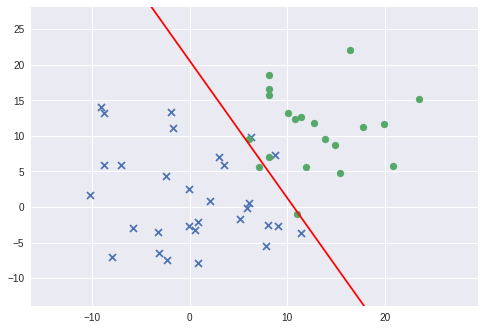

In [5]:
t0, t1 = prepare_dataset(30, [0,0], 40, 20, [15,10], 40)
a = resolve(t0, t1)
show_result(t0, t1, a)